In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("US_Accidents_Cleaned.csv")


C:\Users\polep\AppData\Local\Temp\ipykernel_19668\1002797861.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("US_Accidents_Cleaned.csv")


In [ ]:
Univaraiate Analysis

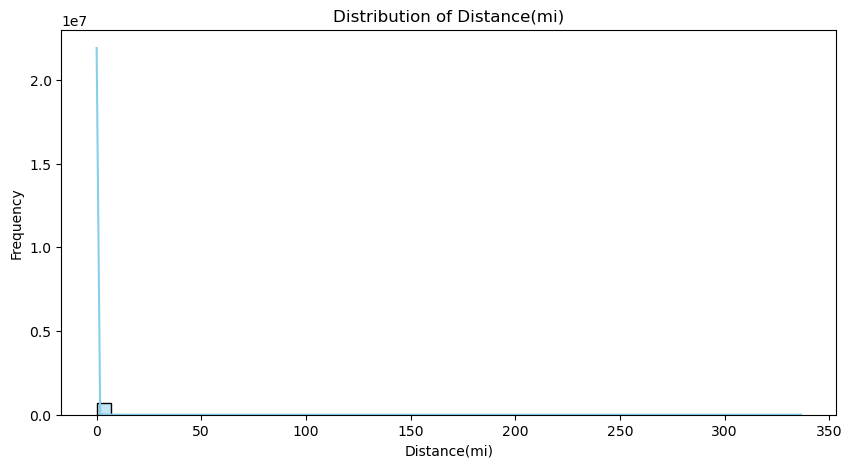

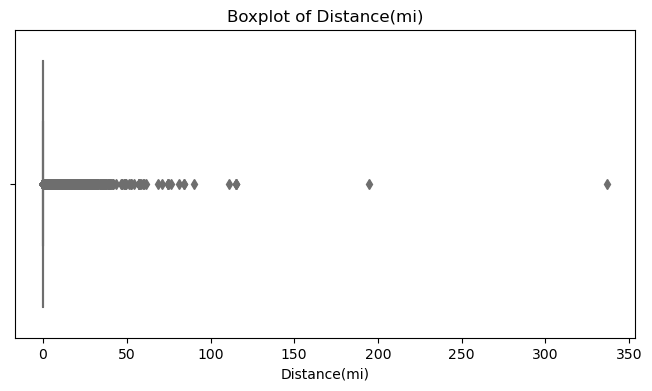

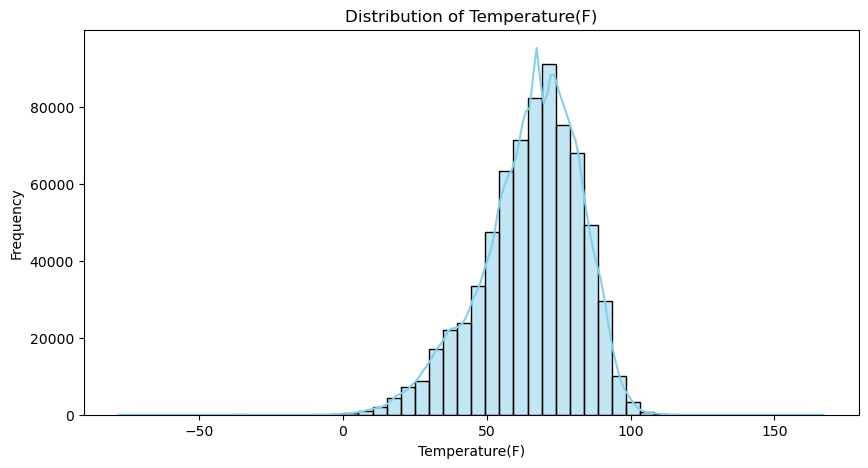

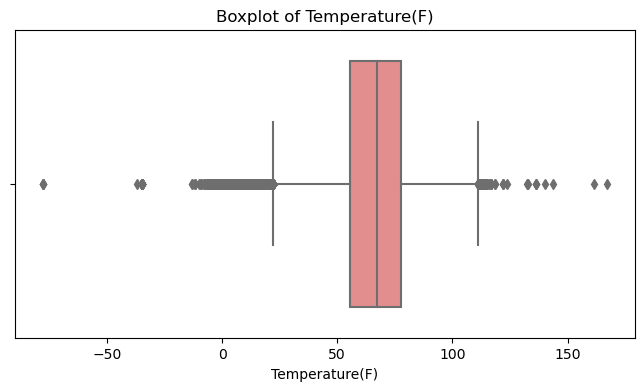

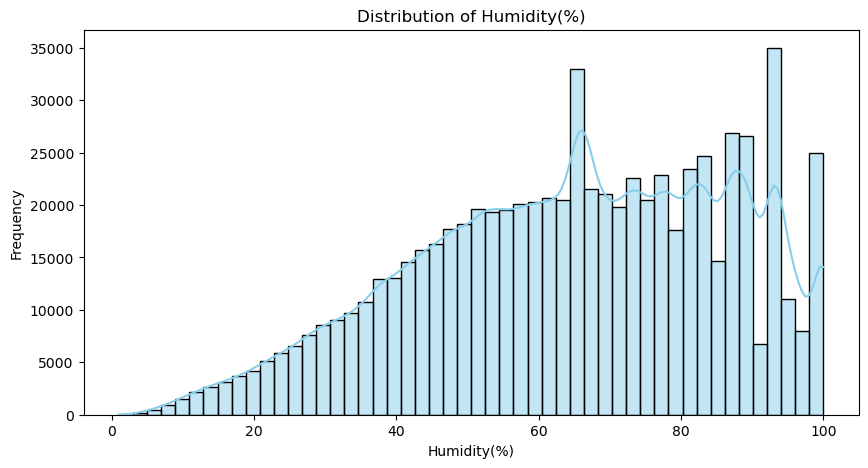

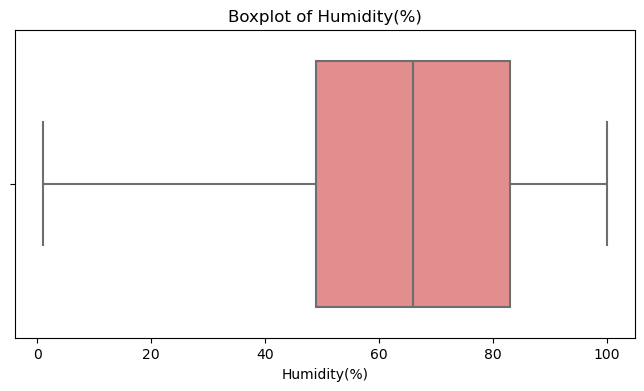

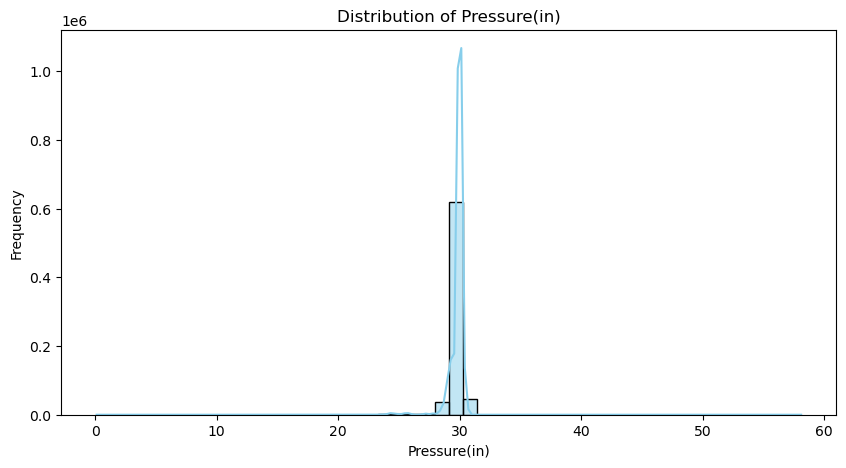

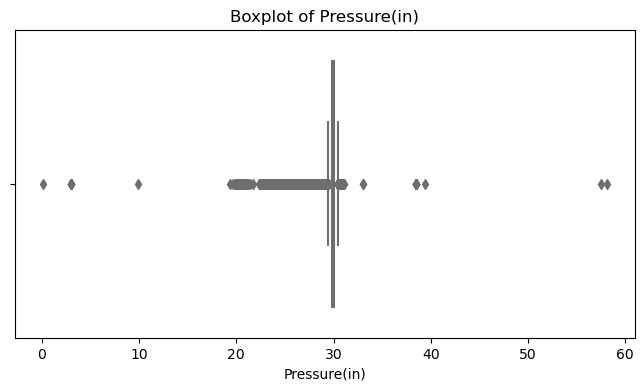

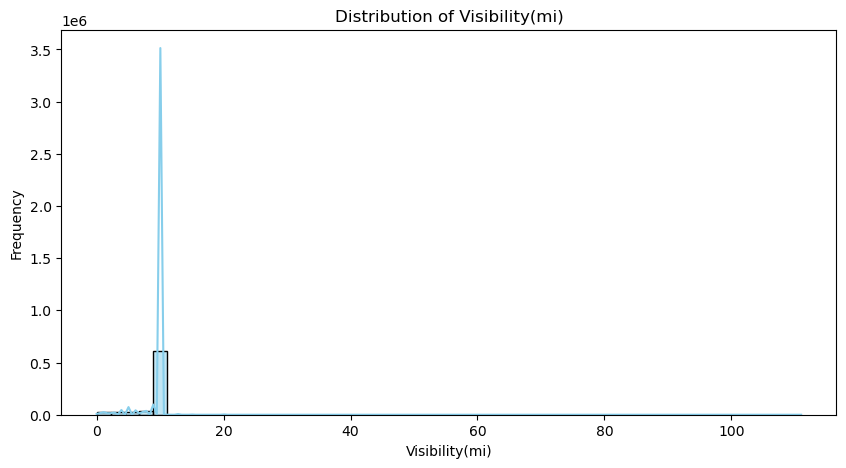

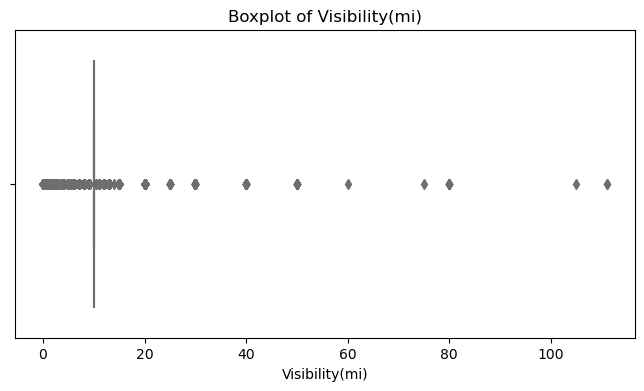

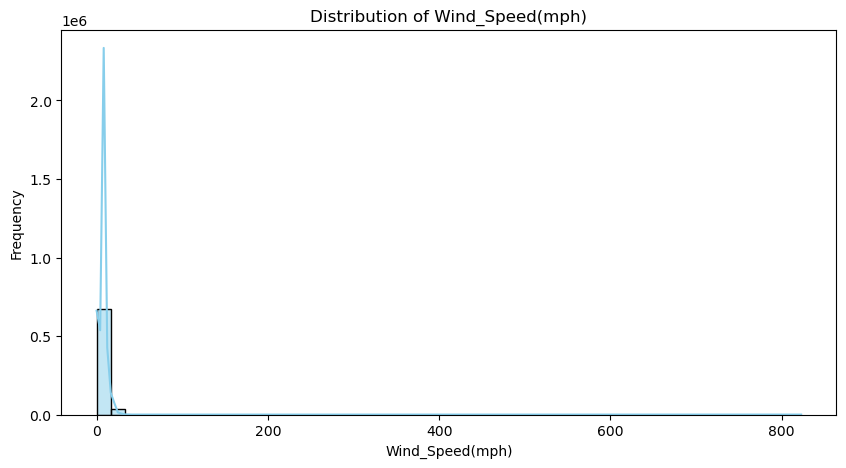

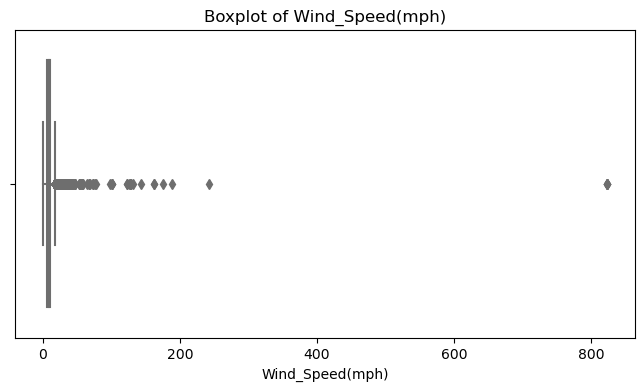

In [6]:
numerical_cols = ['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 
                  'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

for col in numerical_cols:
    plt.figure(figsize=(10,5))                                                     # for numerical values
    
    # Histogram
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    
    # Boxplot (to see outliers)
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.show()

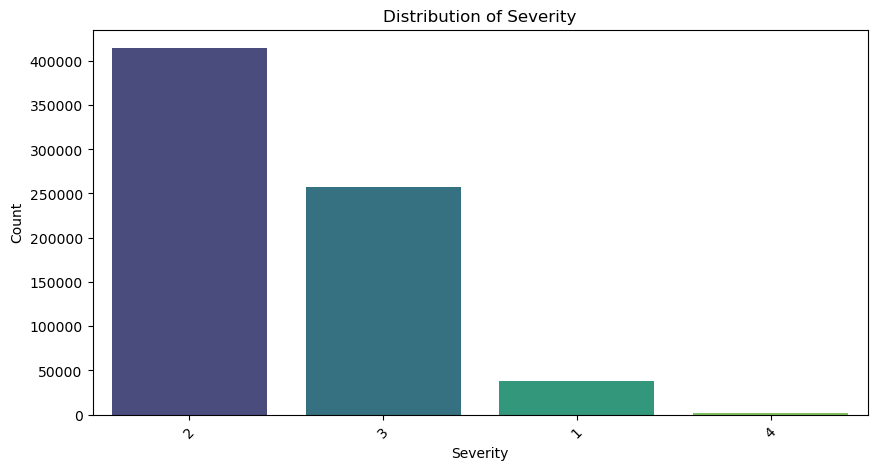


Value Counts for Severity:
2    414686
3    257639
1     38119
4      1525
Name: Severity, dtype: int64


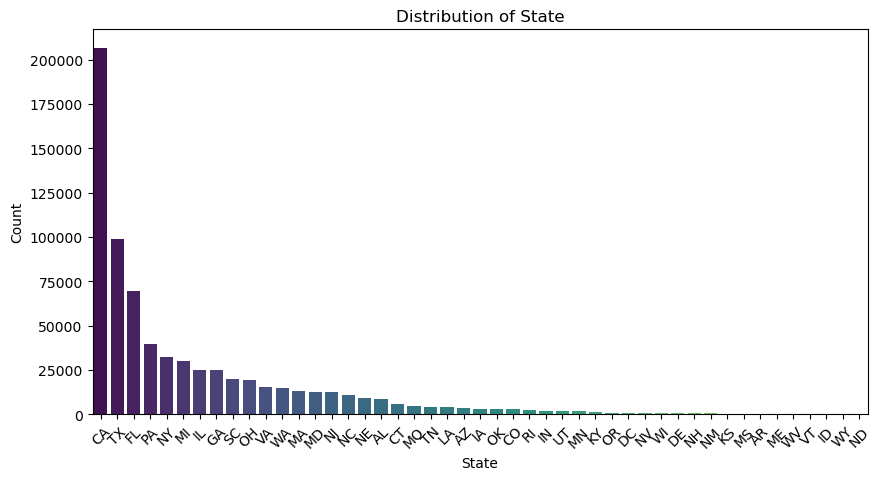


Value Counts for State:
CA    206723
TX     99030
FL     69692
PA     39408
NY     32387
MI     30243
IL     25172
GA     24802
SC     20229
OH     19395
Name: State, dtype: int64


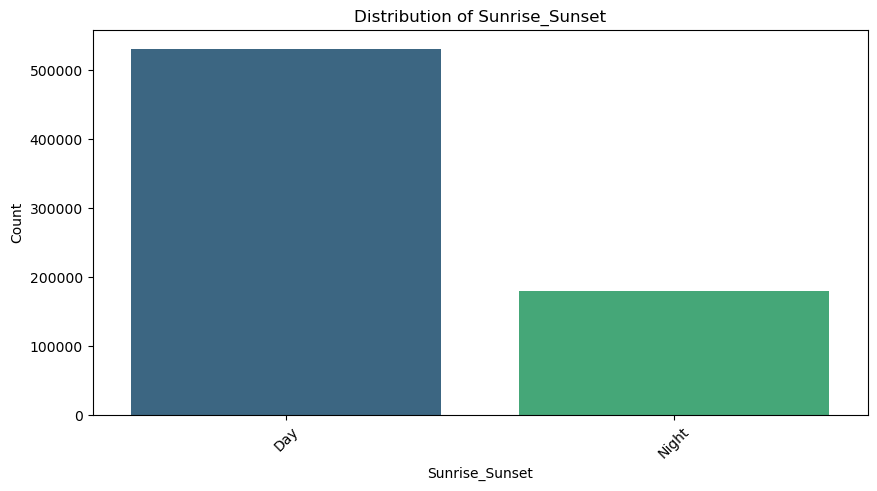


Value Counts for Sunrise_Sunset:
Day      531434
Night    180535
Name: Sunrise_Sunset, dtype: int64


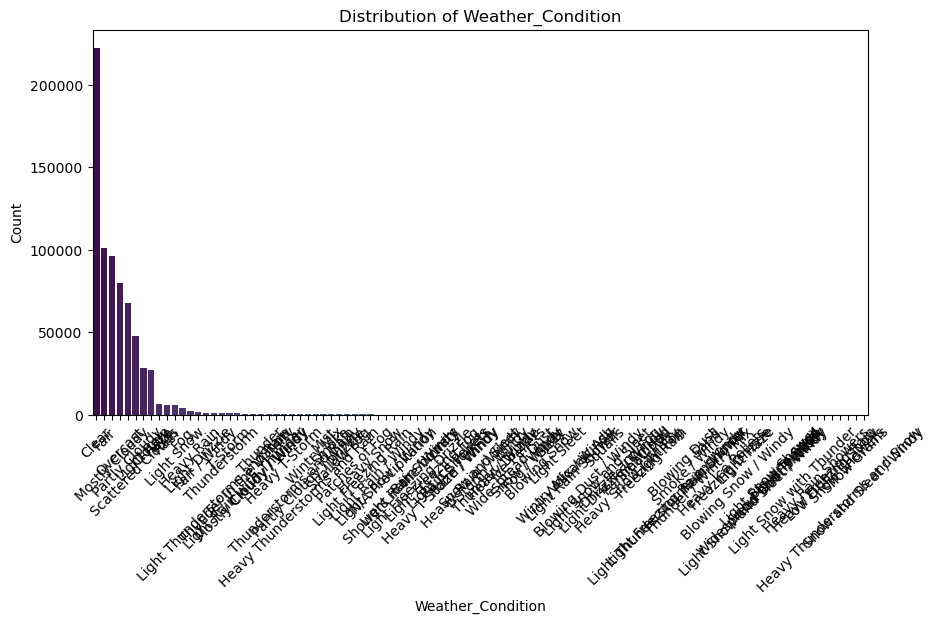


Value Counts for Weather_Condition:
Clear               222281
Fair                101338
Mostly Cloudy        96413
Overcast             80181
Partly Cloudy        67583
Scattered Clouds     47539
Light Rain           28425
Cloudy               27341
Haze                  6857
Rain                  6111
Name: Weather_Condition, dtype: int64


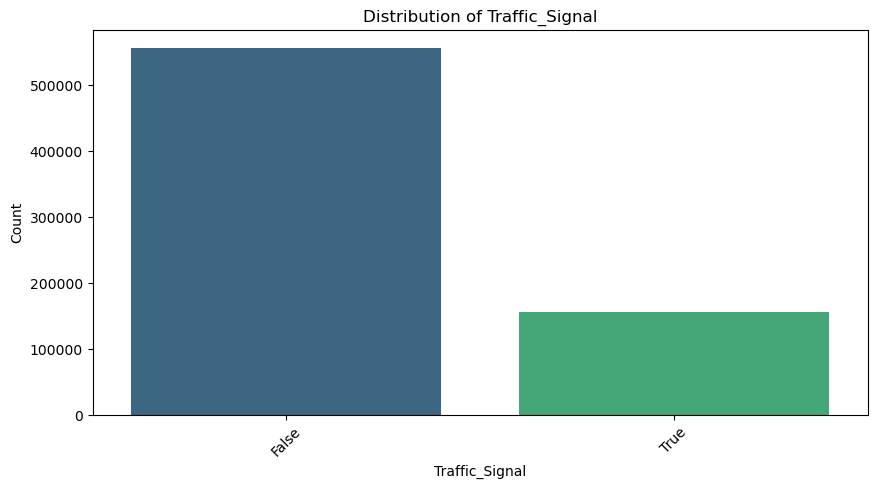


Value Counts for Traffic_Signal:
False    555929
True     156040
Name: Traffic_Signal, dtype: int64


In [7]:
categorical_cols = ['Severity', 'State', 'Sunrise_Sunset', 'Weather_Condition', 'Traffic_Signal']

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    
    order = df[col].value_counts().index  # sort by frequency
    sns.countplot(x=col, data=df, order=order, palette='viridis')     # for categorical values
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()
    
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts().head(10))  # show top 10 categories


In [ ]:
Bivariate Analysis

In [ ]:
1. Severity vs Weather Condition

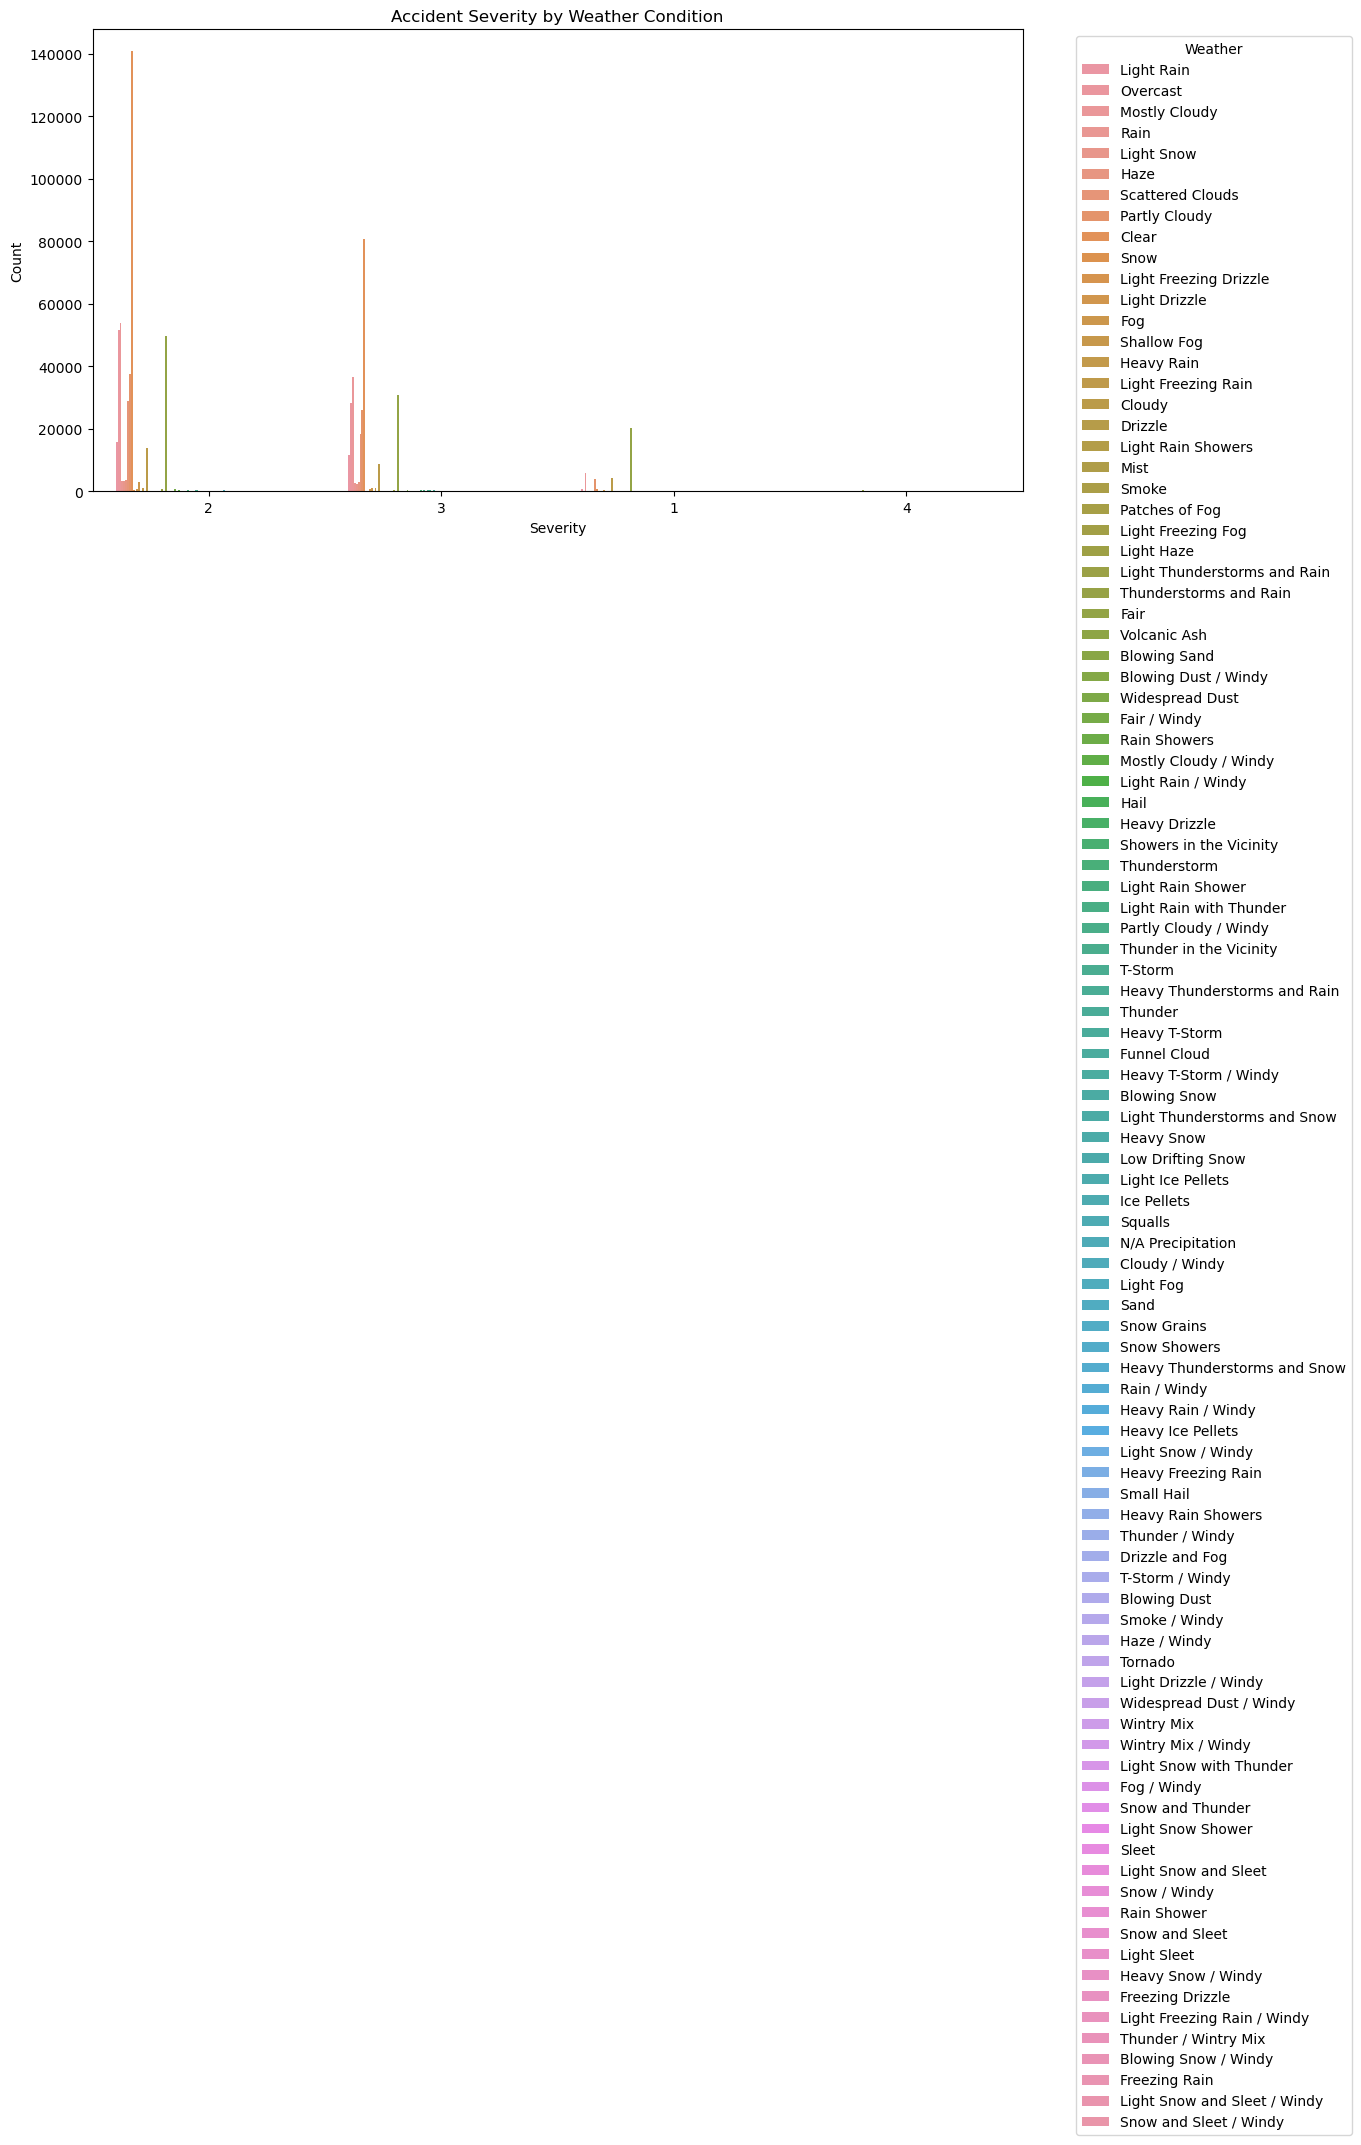

In [4]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Severity", hue="Weather_Condition", order=df["Severity"].value_counts().index)
plt.title("Accident Severity by Weather Condition")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Weather", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [ ]:
2. Severity vs State

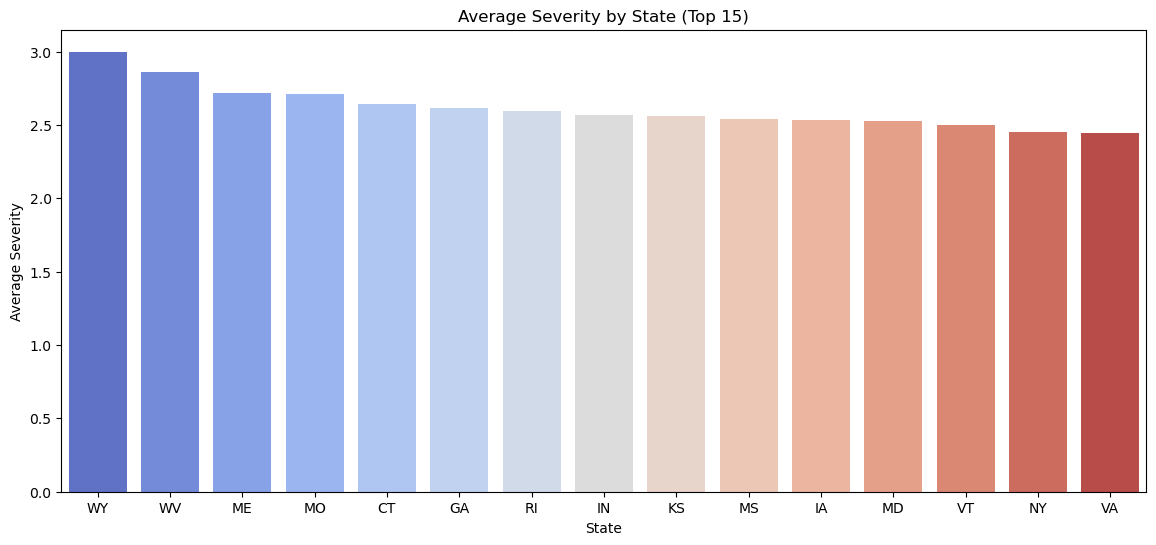

In [5]:
plt.figure(figsize=(14,6))
state_severity = df.groupby("State")["Severity"].mean().sort_values(ascending=False).head(15)
sns.barplot(x=state_severity.index, y=state_severity.values, palette="coolwarm")
plt.title("Average Severity by State (Top 15)")
plt.xlabel("State")
plt.ylabel("Average Severity")
plt.show()


In [ ]:
3. Hour of Day vs Accident Count

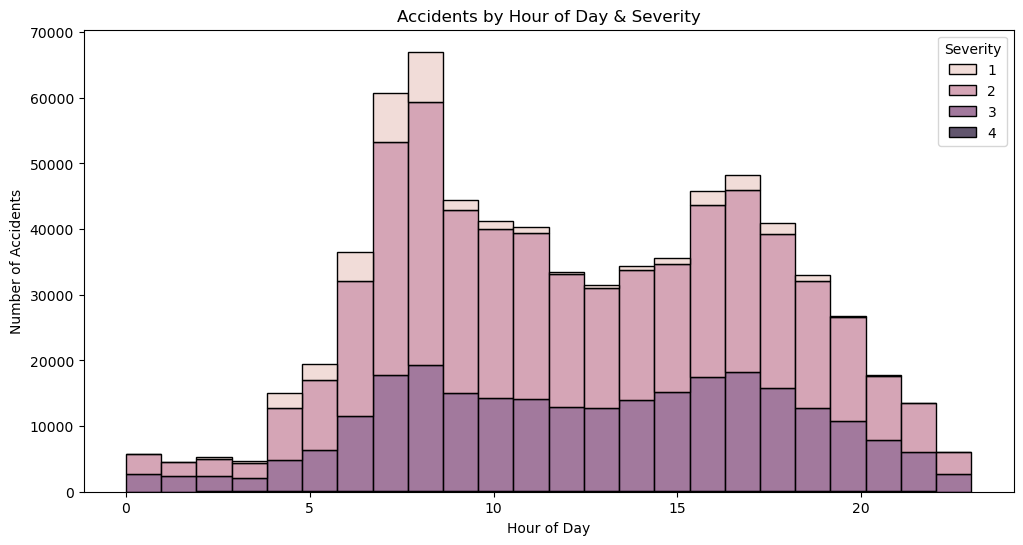

In [8]:
# Convert Start_Time to datetime (if not already)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract Hour
df['Hour'] = df['Start_Time'].dt.hour

# Plot
plt.figure(figsize=(12,6))
sns.histplot(
    data=df,
    x="Hour",
    hue="Severity",
    multiple="stack",
    bins=24
)
plt.title("Accidents by Hour of Day & Severity")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()


In [ ]:
Multivariate Analysis

In [ ]:
1. Accidents by Hour of Day, Severity, and Day of Week

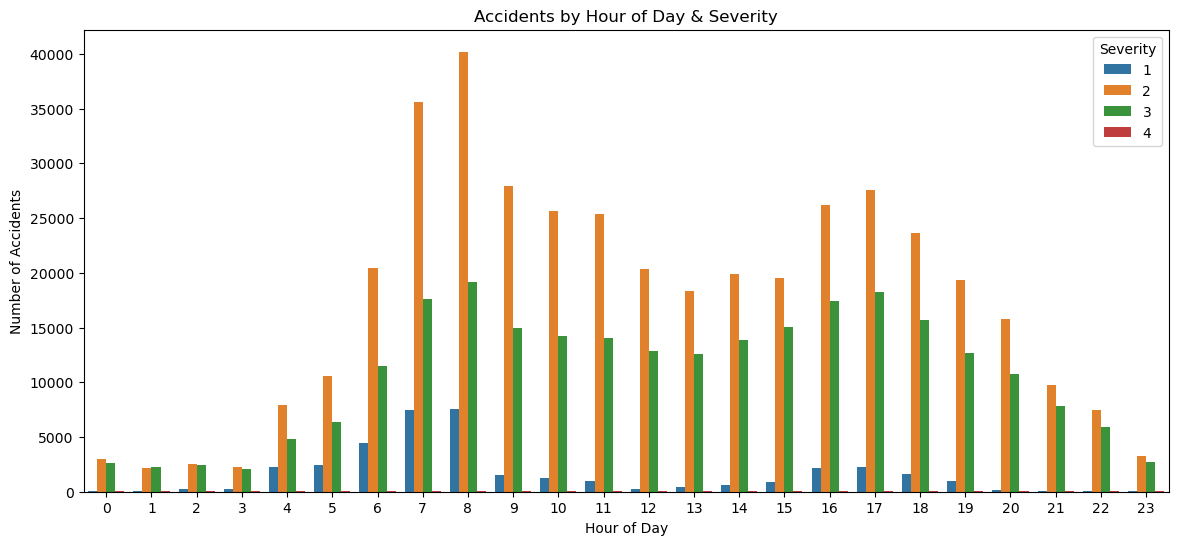

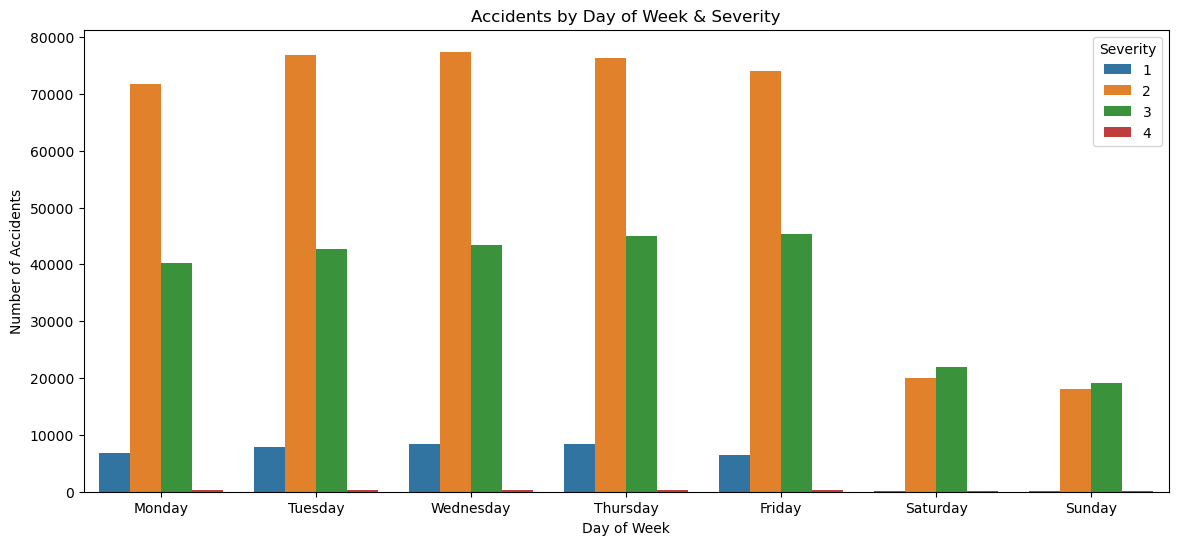

In [9]:
# Extract additional time features
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

plt.figure(figsize=(14,6))
sns.countplot(data=df, x="Hour", hue="Severity", order=sorted(df['Hour'].unique()))
plt.title("Accidents by Hour of Day & Severity")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.legend(title="Severity")
plt.show()

plt.figure(figsize=(14,6))
sns.countplot(data=df, x="DayOfWeek", hue="Severity",
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Accidents by Day of Week & Severity")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.legend(title="Severity")
plt.show()


In [ ]:
2. Accidents by Weather Condition, Severity, and Day/Night

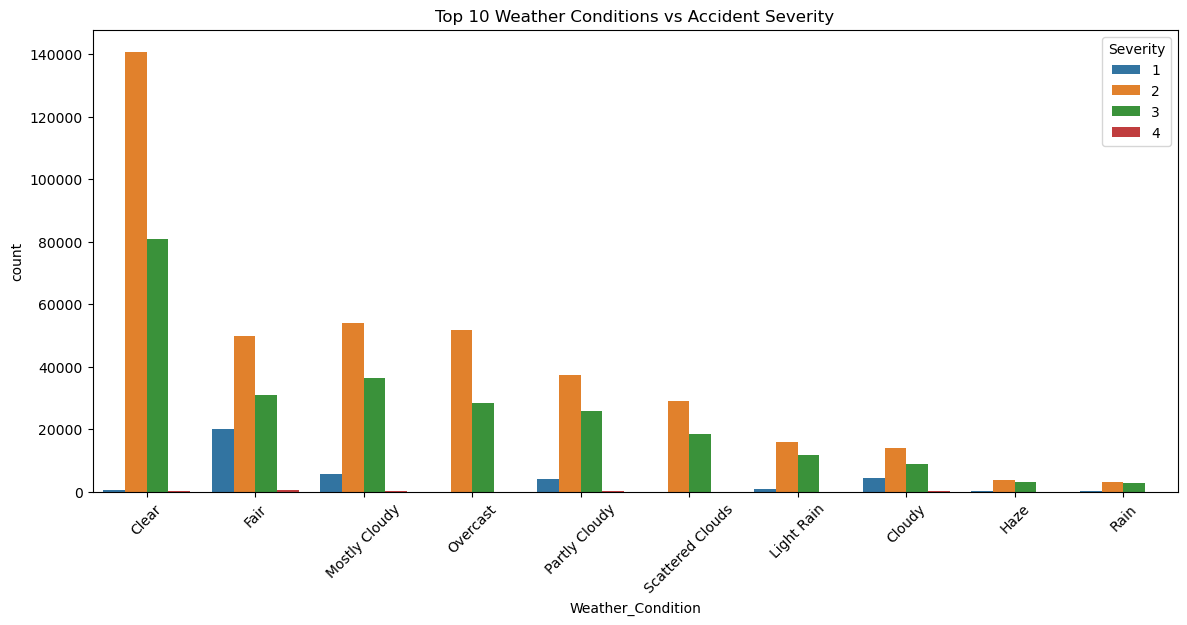

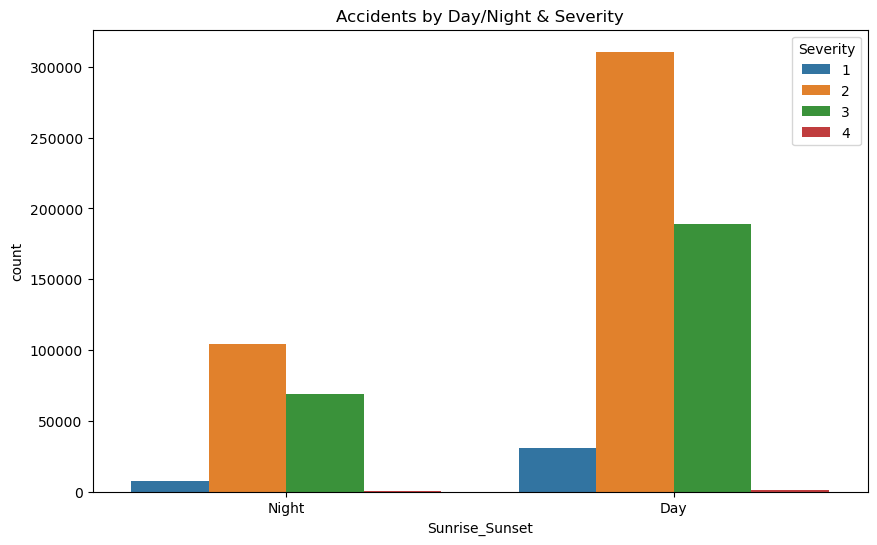

In [10]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x="Weather_Condition", hue="Severity",
              order=df["Weather_Condition"].value_counts().iloc[:10].index)
plt.title("Top 10 Weather Conditions vs Accident Severity")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Sunrise_Sunset", hue="Severity")
plt.title("Accidents by Day/Night & Severity")
plt.show()


In [ ]:
Basic statistics

In [11]:
# --- Summary statistics for all numerical columns ---
print("Summary statistics for numerical columns:")
display(df.describe().T)

Summary statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
Severity,711969.0,2.312612,0.571183,1.000000,2.000000,2.000000,3.000000,4.000000
Start_Lat,711969.0,35.969760,4.949579,24.554800,32.851162,34.921745,40.114559,48.997910
Start_Lng,711969.0,-95.728195,17.740665,-124.497414,-117.807892,-90.335022,-81.278717,-68.283783
Distance(mi),711969.0,0.125425,1.238245,0.000000,0.000000,0.000000,0.010000,336.570007
Temperature(F),711969.0,65.339796,17.024932,-77.800000,55.400000,67.300000,77.700000,167.000000
Humidity(%),711969.0,64.688117,21.654399,1.000000,49.000000,66.000000,83.000000,100.000000
Pressure(in),711969.0,29.826499,0.639488,0.120000,29.810000,29.960000,30.080000,58.100000
Visibility(mi),711969.0,9.261991,2.118875,0.000000,10.000000,10.000000,10.000000,111.000000
Wind_Speed(mph),711969.0,8.348305,5.048929,0.000000,5.800000,8.000000,10.400000,822.800000
Hour,711969.0,12.236815,5.222696,0.000000,8.000000,12.000000,17.000000,23.000000


In [12]:
# --- Additional statistics: median for each numerical column ---
print("\nMedian values for numerical columns:")
display(df.median(numeric_only=True))


Median values for numerical columns:


Severity            2.000000
Start_Lat          34.921745
Start_Lng         -90.335022
Distance(mi)        0.000000
Temperature(F)     67.300000
Humidity(%)        66.000000
Pressure(in)       29.960000
Visibility(mi)     10.000000
Wind_Speed(mph)     8.000000
Amenity             0.000000
Bump                0.000000
Crossing            0.000000
Give_Way            0.000000
Junction            0.000000
No_Exit             0.000000
Railway             0.000000
Roundabout          0.000000
Stop                0.000000
Traffic_Calming     0.000000
Traffic_Signal      0.000000
Turning_Loop        0.000000
Hour               12.000000
dtype: float64

In [ ]:
 Explore distributions and ranges for key features

In [ ]:
1. Severity


Severity value counts:
1     38119
2    414686
3    257639
4      1525
Name: Severity, dtype: int64


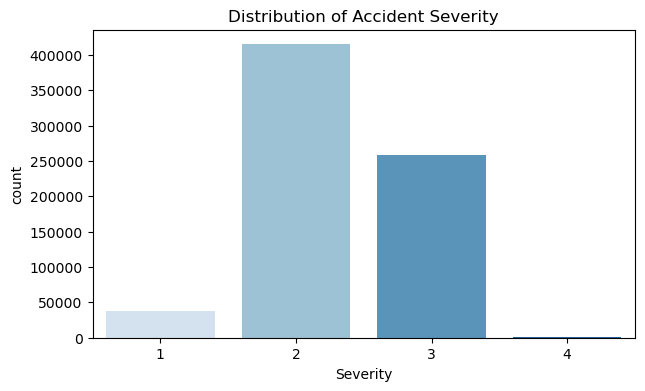

In [16]:
print("\nSeverity value counts:")
print(df['Severity'].value_counts().sort_index())

plt.figure(figsize=(7, 4))
sns.countplot(x='Severity', data=df, palette='Blues')
plt.title('Distribution of Accident Severity')
plt.show()

In [ ]:
2. Temperature

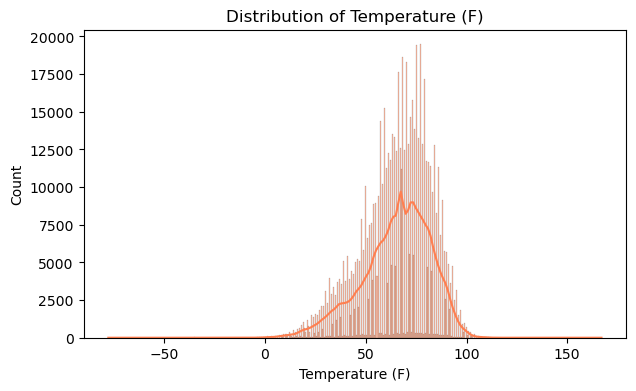

Temperature (F): min = -77.8 | max = 167.0


In [17]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Temperature(F)'].dropna(), kde=True, color='coral')
plt.title('Distribution of Temperature (F)')
plt.xlabel('Temperature (F)')
plt.show()
print("Temperature (F): min =", df['Temperature(F)'].min(), 
      "| max =", df['Temperature(F)'].max())

In [ ]:
3. Visibility

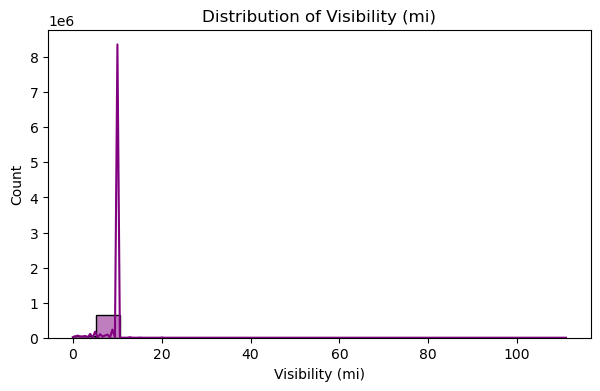

Visibility (mi): min = 0.0 | max = 111.0


In [18]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Visibility(mi)'].dropna(), kde=True, color='purple')
plt.title('Distribution of Visibility (mi)')
plt.xlabel('Visibility (mi)')
plt.show()
print("Visibility (mi): min =", df['Visibility(mi)'].min(),
      "| max =", df['Visibility(mi)'].max())

In [ ]:
4. Explore Weather Condition categories


Most frequent Weather Conditions:
Clear               222281
Fair                101338
Mostly Cloudy        96413
Overcast             80181
Partly Cloudy        67583
Scattered Clouds     47539
Light Rain           28425
Cloudy               27341
Haze                  6857
Rain                  6111
Name: Weather_Condition, dtype: int64


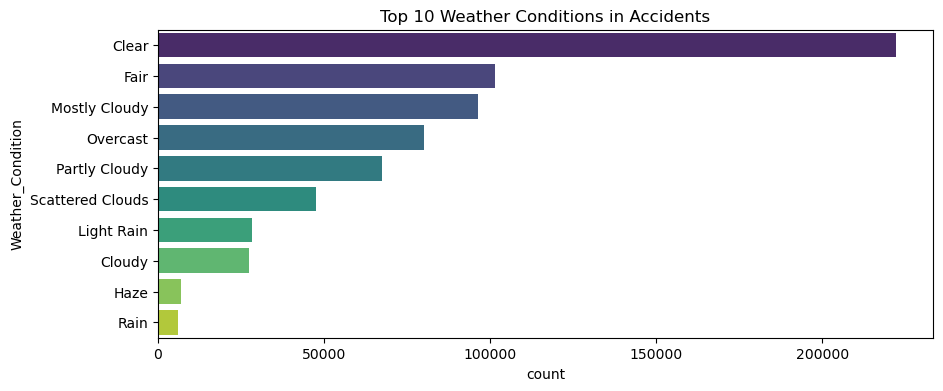

In [20]:
print("\nMost frequent Weather Conditions:")
print(df['Weather_Condition'].value_counts(dropna=True).head(10))

plt.figure(figsize=(10, 4))
sns.countplot(y='Weather_Condition', data=df,
              order=df['Weather_Condition'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Weather Conditions in Accidents')
plt.show()

In [ ]:
 5. Explore distribution over latitude and longitude (range)

In [21]:
print("\nLatitude range:", df['Start_Lat'].min(), "to", df['Start_Lat'].max())
print("Longitude range:", df['Start_Lng'].min(), "to", df['Start_Lng'].max())


Latitude range: 24.5548 to 48.99791
Longitude range: -124.497414 to -68.283783
